In [1]:
import pandas as pd
import shapely
import geopandas as gpd

In [2]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
gdf = gpd.read_file('data/world.gpkg')

In [4]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [5]:
gdf.shape

(177, 11)

In [6]:
gdf

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [7]:
gdf[gdf['name_long'] == 'Egypt']

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
163,EG,Egypt,Africa,Africa,Northern Africa,Sovereign country,996311.623,91812566.000,71.120,9879.799,"MULTIPOLYGON (((36.86623 22, 36.69069 22.20485..."


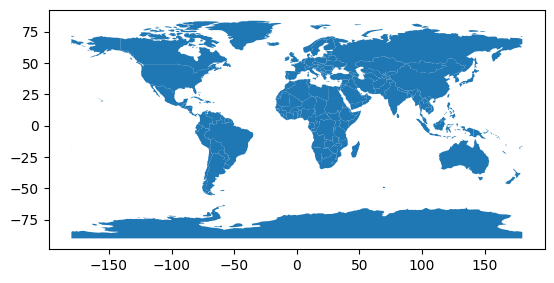

In [8]:
gdf.plot();

In [9]:
gdf.explore()

In [10]:
gdf[gdf['name_long'] == 'Egypt'].explore()

In [11]:
gdf.geometry

0      MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...
1      MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...
2      MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...
                             ...                        
174    MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...
175    MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...
176    MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...
Name: geometry, Length: 177, dtype: geometry

In [12]:
gdf.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf.envelope

0      POLYGON ((-180 -18.28799, 179.99999 -18.28799,...
1      POLYGON ((29.34 -11.72094, 40.31659 -11.72094,...
2      POLYGON ((-17.06342 20.99975, -8.66512 20.9997...
                             ...                        
174    POLYGON ((20.0707 41.84711, 21.77505 41.84711,...
175    POLYGON ((-61.95 10, -60.895 10, -60.895 10.89...
176    POLYGON ((23.88698 3.50917, 35.29801 3.50917, ...
Length: 177, dtype: geometry

In [14]:
gdf.envelope[0].wkt

'POLYGON ((-180 -18.287990000000004, 179.99999 -18.287990000000004, 179.99999 -16.02088225674122, -180 -16.02088225674122, -180 -18.287990000000004))'

In [15]:
gdf2 = gdf.copy()
gdf2.geometry = gdf.envelope
gdf2

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"POLYGON ((-180 -18.28799, 179.99999 -18.28799,..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"POLYGON ((29.34 -11.72094, 40.31659 -11.72094,..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"POLYGON ((-17.06342 20.99975, -8.66512 20.9997..."
...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"POLYGON ((20.0707 41.84711, 21.77505 41.84711,..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"POLYGON ((-61.95 10, -60.895 10, -60.895 10.89..."
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"POLYGON ((23.88698 3.50917, 35.29801 3.50917, ..."


In [16]:
gdf.geometry.type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
           ...     
174    MultiPolygon
175    MultiPolygon
176    MultiPolygon
Length: 177, dtype: object

In [17]:
gdf.geometry.type.value_counts()

MultiPolygon    177
Name: count, dtype: int64

In [18]:
gdf['bbox'] = gdf.envelope
gdf['polygon'] = gdf.geometry
gdf

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,bbox,polygon
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...","POLYGON ((-180 -18.28799, 179.99999 -18.28799,...","MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...","POLYGON ((29.34 -11.72094, 40.31659 -11.72094,...","MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...","POLYGON ((-17.06342 20.99975, -8.66512 20.9997...","MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...","POLYGON ((20.0707 41.84711, 21.77505 41.84711,...","MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...","POLYGON ((-61.95 10, -60.895 10, -60.895 10.89...","MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...","POLYGON ((23.88698 3.50917, 35.29801 3.50917, ...","MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [19]:
gdf = gdf.set_geometry('bbox')
gdf.explore()

In [20]:
gdf = gdf.set_geometry('polygon')
gdf.explore()

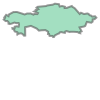

In [21]:
gdf.geometry.iloc[5]

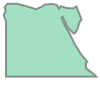

In [22]:
gdf[gdf['name_long'] == 'Egypt'].geometry.iloc[0]

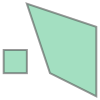

In [23]:
multipolygon = shapely.MultiPolygon([
    shapely.Polygon([(1,5), (2,2), (4,1), (4,4), (1,5)]),  ## Polygon 1 
    shapely.Polygon([(0,2), (1,2), (1,3), (0,3), (0,2)])   ## Polygon 2, etc.
])
multipolygon

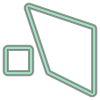

In [24]:
multipolygon.buffer(0.2).difference(multipolygon)

In [25]:
lnd_point = shapely.Point(0.1, 51.5)
lnd_geom = gpd.GeoSeries([lnd_point], crs=4326)
lnd_geom

0    POINT (0.1 51.5)
dtype: geometry

In [26]:
lnd_data = {
    'name': ['London'],
    'temperature': [25],
    'date': ['2023-06-21'],
    'geometry': lnd_geom,
}

In [27]:
lnd_layer = gpd.GeoDataFrame(lnd_data)
lnd_layer

,name,temperature,date,geometry
0,London,25,2023-06-21,POINT (0.1 51.5)


In [29]:
lnd_point = shapely.Point(0.1, 51.5)
paris_point = shapely.Point(2.3, 48.9)
towns_geom = gpd.GeoSeries([lnd_point, paris_point], crs=4326)
towns_data = {
  'name': ['London', 'Paris'],
  'temperature': [25, 27],
  'date': ['2013-06-21', '2013-06-21'],
  'geometry': towns_geom
}
towns_layer = gpd.GeoDataFrame(towns_data)
towns_layer

,name,temperature,date,geometry
0,London,25,2013-06-21,POINT (0.1 51.5)
1,Paris,27,2013-06-21,POINT (2.3 48.9)


In [30]:
towns_layer.explore(color='red', marker_kwds={'radius':10})

In [34]:
import xyzservices as xyz

In [37]:
[p for p in dir(xyz.providers) if not p.startswith('_')]

['AzureMaps',
 'BaseMapDE',
 'BasemapAT',
 'CartoDB',
 'CyclOSM',
 'Esri',
 'FreeMapSK',
 'Gaode',
 'GeoportailFrance',
 'HERE',
 'HEREv3',
 'HikeBike',
 'Jawg',
 'JusticeMap',
 'MapBox',
 'MapTiler',
 'MapTilesAPI',
 'MtbMap',
 'NASAGIBS',
 'NLS',
 'OPNVKarte',
 'OneMapSG',
 'OpenAIP',
 'OpenFireMap',
 'OpenRailwayMap',
 'OpenSeaMap',
 'OpenSnowMap',
 'OpenStreetMap',
 'OpenTopoMap',
 'OpenWeatherMap',
 'OrdnanceSurvey',
 'SafeCast',
 'Stadia',
 'Strava',
 'SwissFederalGeoportal',
 'Thunderforest',
 'TomTom',
 'TopPlusOpen',
 'UN',
 'USGS',
 'WaymarkedTrails',
 'nlmaps']

In [39]:
[p for p in dir(xyz.providers.Esri) if not p.startswith('_')]

['AntarcticBasemap',
 'AntarcticImagery',
 'ArcticImagery',
 'ArcticOceanBase',
 'ArcticOceanReference',
 'NatGeoWorldMap',
 'OceanBasemap',
 'WorldGrayCanvas',
 'WorldImagery',
 'WorldPhysical',
 'WorldShadedRelief',
 'WorldStreetMap',
 'WorldTerrain',
 'WorldTopoMap']

In [42]:
import xyzservices.providers as xyz
towns_layer.explore(color='red', marker_kwds={'radius':10},
                    tiles=xyz.Esri.WorldStreetMap)

In [43]:
import xyzservices
[p for p in dir(xyz.Esri) if not p.startswith('_')]

['AntarcticBasemap',
 'AntarcticImagery',
 'ArcticImagery',
 'ArcticOceanBase',
 'ArcticOceanReference',
 'NatGeoWorldMap',
 'OceanBasemap',
 'WorldGrayCanvas',
 'WorldImagery',
 'WorldPhysical',
 'WorldShadedRelief',
 'WorldStreetMap',
 'WorldTerrain',
 'WorldTopoMap']

In [49]:
point = shapely.Point([5, 2])

linestring = shapely.LineString([(1,5), (4,4), (4,1), (2,2), (3,2)])

polygon = shapely.Polygon(
    [(1,5), (2,2), (4,1), (4,4), (1,5)],  ## Exterior
    [[(2,4), (3,4), (3,3), (2,3), (2,4)]]  ## Hole(s)
)

multipolygon = shapely.MultiPolygon([
    [[(1,5), (2,2), (4,1), (4,4), (1,5)], []],  ## Polygon 1 
    [[(0,2), (1,2), (1,3), (0,3), (0,2)], []]   ## Polygon 2, etc.
])

print(linestring.length)

print(multipolygon.area)

9.39834563766817
8.0


In [50]:
gpd.GeoSeries([point, linestring, polygon, multipolygon]).area

0   0.000
1   0.000
2   6.000
3   8.000
dtype: float64

In [52]:
gdf[gdf['name_long'] == 'Slovenia'].to_crs(32633).area

150   19104099960.603
dtype: float64

## Raster data

import numpy as np
import rasterio
import rasterio.plot

In [53]:
import numpy as np
import rasterio
import rasterio.plot

In [56]:
src = rasterio.open('data/srtm.tif')
src

<open DatasetReader name='data/srtm.tif' mode='r'>

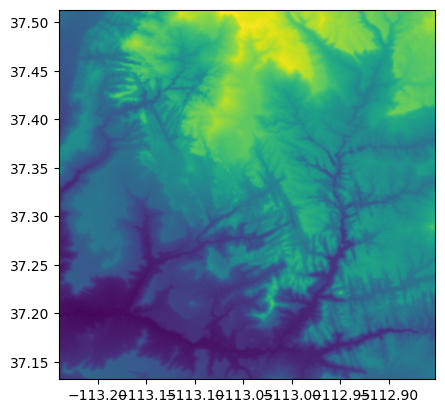

In [58]:
rasterio.plot.show(src);

In [59]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 65535.0,
 'width': 465,
 'height': 457,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333332777796, 0.0, -113.23958321278403,
        0.0, -0.0008333333332777843, 37.512916763165805)}

In [60]:
src.read(1)

array([[1728, 1718, 1715, ..., 2654, 2674, 2685],
       [1737, 1727, 1717, ..., 2649, 2677, 2693],
       [1739, 1734, 1727, ..., 2644, 2672, 2695],
       ...,
       [1326, 1328, 1329, ..., 1777, 1778, 1775],
       [1320, 1323, 1326, ..., 1771, 1770, 1772],
       [1319, 1319, 1322, ..., 1768, 1770, 1772]],
      shape=(457, 465), dtype=uint16)

In [61]:
elev = np.arange(1,37,dtype=np.uint8).reshape(6,6)

v = [
  1, 0, 1, 2, 2, 2, 
  0, 2, 0, 0, 2, 1, 
  0, 2, 2, 0, 0, 2, 
  0, 0, 1, 1, 1, 1, 
  1, 1, 1, 2, 1, 1, 
  2, 1, 2, 2, 0, 2
]
grain = np.array(v, dtype=np.uint8).reshape(6, 6)

In [62]:
new_transform = rasterio.transform.from_origin(
    west=-1.5,
    north=1.5,
    xsize=0.5,
    ysize=0.5
)

new_transform

Affine(0.5, 0.0, -1.5,
       0.0, -0.5, 1.5)

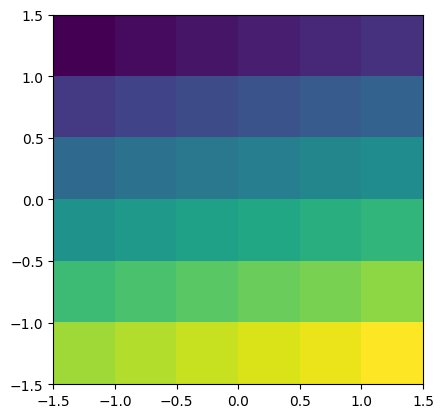

In [63]:
rasterio.plot.show(elev, transform=new_transform);

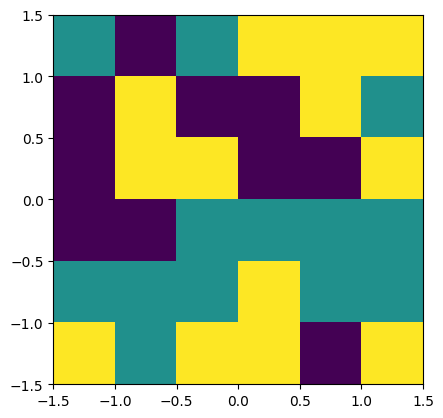

In [64]:
rasterio.plot.show(grain, transform=new_transform);

In [65]:
new_dataset = rasterio.open(
    'output/elev.tif', 'w', 
    driver='GTiff',
    height=elev.shape[0],
    width=elev.shape[1],
    count=1,
    dtype=elev.dtype,
    crs=4326,
    transform=new_transform
)
new_dataset.write(elev, 1)
new_dataset.close()

In [66]:
new_dataset = rasterio.open(
    'output/grain.tif', 'w', 
    driver='GTiff',
    height=grain.shape[0],
    width=grain.shape[1],
    count=1,
    dtype=grain.dtype,
    crs=4326,
    transform=new_transform
)
new_dataset.write(grain, 1)
new_dataset.close()

In [69]:
import pyproj

epsg_codes = pyproj.get_codes('EPSG', 'CRS')
epsg_codes[:5]

['10150', '10151', '10156', '10157', '10158']

In [71]:
pyproj.CRS.from_epsg(4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
zion = gpd.read_file('data/zion.gpkg')
zion.crs

<Bound CRS: PROJCS["UTM Zone 12, Northern Hemisphere",GEOGCS[" ...>
Name: UTM Zone 12, Northern Hemisphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from GRS 1980(IUGG, 1980) to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich
Source CRS: UTM Zone 12, Northern Hemisphere

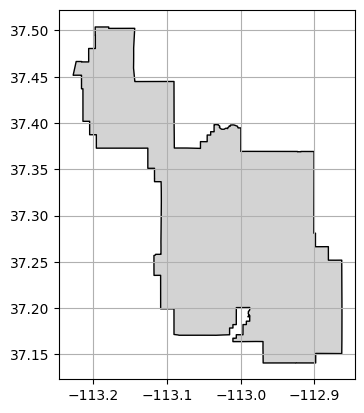

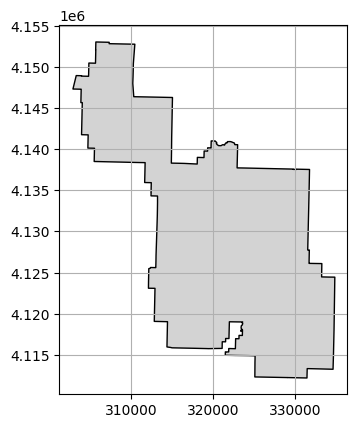

In [73]:
zion.to_crs(4326).plot(edgecolor='black', color='lightgray').grid()
zion.plot(edgecolor='black', color='lightgrey').grid()

In [74]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 65535.0,
 'width': 465,
 'height': 457,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333332777796, 0.0, -113.23958321278403,
        0.0, -0.0008333333332777843, 37.512916763165805)}